In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

DIR = "/content/drive/MyDrive/Competitions/Signate/OCEAN180"
INPUT_DIR = os.path.join(DIR,"input")
OUTPUT_DIR = os.path.join(DIR,"output")

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
train = pd.read_csv(os.path.join(INPUT_DIR,"train_data.csv"))
test = pd.read_csv(os.path.join(INPUT_DIR,"test_data.csv"))
sample_sub = pd.read_csv(os.path.join(INPUT_DIR,"submit_example.csv"), header=None)

print(train.shape)
display(train.head(3))

print(test.shape)
display(test.head(3))

print(sample_sub.shape)
display(sample_sub.head(3))

(14140, 3465)


,Unnamed: 0,lat,lon,area,YMD,year,month,cover,depth_original,cliff_length,...,MIN_NormG_2020,MIN_NormR_2020,MIN_PPR_2020,MIN_PSNDc2_2020,MIN_RDVI_2020,MIN_IF_2020,MIN_SLAVI_2020,MIN_SIPI2_2020,MIN_VARIgreen_2020,mesh20
0,0,24.989139,125.243167,20.0,20110926,2011.0,9.0,0.050,NaN,0.0,...,0.507961,0.287288,-0.278071,-0.808075,-2.341663,2.353039,95.142525,3.728732,-2.405135,3725_10
1,1,26.996172,127.912024,40.0,2009.7.6-2009.7.28,2009.0,7.0,0.725,NaN,0.0,...,0.353645,0.245048,-0.100556,-0.771423,-3.282602,4.672225,174.767501,-0.571513,0.448861,4027_13
2,2,26.363556,127.735139,20.0,20091014,2009.0,10.0,0.025,NaN,0.0,...,0.579204,0.281260,-0.191884,-0.853730,-3.160207,3.324236,62.711236,3.284478,-57.136191,3927_22


(4039, 3464)


,Unnamed: 0,lat,lon,area,YMD,year,month,depth_original,cliff_length,aicial_length,...,MIN_NormG_2020,MIN_NormR_2020,MIN_PPR_2020,MIN_PSNDc2_2020,MIN_RDVI_2020,MIN_IF_2020,MIN_SLAVI_2020,MIN_SIPI2_2020,MIN_VARIgreen_2020,mesh20
0,0,24.352222,124.202674,20.0,2002.12,2002.0,12.0,0.5,0.000000,725.621704,...,0.409346,0.323023,-0.066356,-0.560810,-3.203797,4.297234,926.905329,1.669992,0.194766,3624_20
1,1,24.420028,124.078583,20.0,20100723,2010.0,7.0,NaN,0.000000,0.000000,...,0.540733,0.275585,-0.291240,-0.824888,-2.222276,2.263106,57.661693,4.274851,-79.273275,3624_20
2,2,26.494197,127.836013,100.0,"2004.2.20-2004.2.22,2004.2.27-2004.2.29,2004.3...",2004.0,2.0,13.8,73.183418,80.595177,...,0.601792,0.252251,-0.318454,-0.861477,-2.060505,2.099250,42.672829,5.655713,-2.061417,3927_23


(4039, 2)


,0,1
0,0,0.47
1,1,0.68
2,2,0.25


In [5]:
train.rename(columns={"Unnamed: 0":"id"}, inplace=True)
test.rename(columns={"Unnamed: 0":"id"}, inplace=True)

In [6]:
def missing_func(df):
  total = df.isnull().sum().sort_values(ascending=False)
  percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
  df_missing = pd.concat([total,percent],axis=1,keys=['total','percent'])
  return df_missing 

In [7]:
train_missing = missing_func(train)
test_missing = missing_func(test)

In [8]:
train_cols = train.columns.tolist()
test_cols = test.columns.tolist()

target = set(train_cols) - set(test_cols)
print(target)

display(train[target].head(3))

{'cover'}


,cover
0,0.050
1,0.725
2,0.025


max : 1.000000
min : 0.000000
Skewness: 1.570970
Kurtosis: 1.087887


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


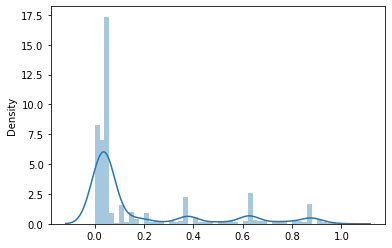

In [9]:
sns.distplot(train[target])

print("max : %f" %train[target].max())
print("min : %f" %train[target].min())
print('Skewness: %f' %train[target].skew())  #歪度
print('Kurtosis: %f' %train[target].kurt())  #尖度

In [10]:
train["depth_flag"] = 0
train.loc[train["depth"]<=1.0, "depth_flag"] = 1

In [11]:
train["cover_flag"] = 0
train.loc[train["cover"]>.2, "cover_flag"] = 1

In [12]:
train_missing_50 = train_missing[train_missing.percent<0.5].index
test_missing_50 =  test_missing[test_missing.percent<0.5].index

categorical_features = train.dtypes[train.dtypes=="object"].index

features = set(train_missing_50) & set(test_missing_50)
features = set(features) - set(categorical_features) 

In [13]:
display(train[features])

,MED_Ferrous_Silicates_2006,MAX_CTVI_2009,MAX_mCRIRE_2007,MED_B11,MED_SWIR2_2005,MAX_PSNDc2_2017,MAX_TIRS1_2015,MED_Ferric_Oxides_2005,MIN_GVMI_2016,MIN_AFRI1600,...,Salinity_annual,MAX_ARI,MIN_H_2005,MIN_D678_500_2018,MIN_TSAVI_2003,MIN_NLI_2019,MED_DSWI_2017,MED_SIPI2_2004,MAX_SIPI2_2017,MAX_Ferrous_Silicates_2015
0,0.264745,0.235750,-0.266632,134.000336,0.220672,-0.728505,9.046733,0.122242,0.902925,-0.794898,...,34.560532,-12.509911,1.543756,-54.588516,-0.709085,-0.089512,2.198063,4.010577,5.226732,0.247929
1,0.189058,NaN,-0.156360,811.198669,0.211509,-0.071845,8.880975,0.081264,0.891456,-0.274002,...,34.657925,4.429682,1.499067,-31.171555,NaN,0.957531,1.928320,NaN,2.621933,0.268718
2,0.241709,0.641468,-0.194787,1220.452026,1.059149,-0.359515,9.253022,0.147558,0.867583,-0.286893,...,34.709606,1.312938,1.537530,-48.534893,-0.583855,0.727847,2.353333,3.418947,4.177212,0.274035
3,NaN,NaN,NaN,462.755005,NaN,-0.786787,8.864739,NaN,0.939284,-0.390327,...,34.658588,-1.373712,NaN,-61.760668,NaN,0.009156,2.862984,NaN,6.747245,0.250801
4,0.228142,NaN,NaN,406.848724,NaN,-0.804983,8.753400,NaN,0.867211,-0.464228,...,34.658199,-4.651605,NaN,-77.889240,NaN,0.009402,2.653276,NaN,10.059876,0.216011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14135,0.231144,0.553957,-0.332405,450.751648,0.692350,-0.243013,9.288019,0.173815,0.925621,-0.563076,...,34.577484,-2.139756,1.538079,-49.325401,-0.146605,0.441389,2.034123,11.757386,6.561371,0.278072
14136,0.257303,NaN,NaN,695.141846,NaN,-0.468197,9.049720,NaN,0.873594,-0.464584,...,34.654415,-1.738787,NaN,-47.733049,NaN,-0.290930,2.293397,NaN,5.063838,0.324296
14137,0.135842,0.438533,NaN,203.546127,0.735727,-0.380647,9.065918,0.169057,0.873229,-0.956705,...,34.567966,-9.322565,1.560641,-59.463144,NaN,-0.146362,2.153771,6.051790,5.532957,0.255705
14138,0.163420,NaN,NaN,1032.687134,NaN,-0.441792,9.142158,NaN,0.940312,-0.506263,...,34.655884,-0.615380,NaN,-45.393143,NaN,0.847036,1.892262,NaN,3.609170,0.180184


In [14]:
tr_mesh = train.mesh20.value_counts().index
te_mesh = test.mesh20.value_counts().index

test_only_mesh = list(set(te_mesh)-set(tr_mesh))
test_mesh = list(set(te_mesh)-set(test_only_mesh))

In [15]:
def get_mesh_values(df):
  _df = df["mesh20"].str.split('_').apply(pd.Series).astype(float)
  _df.columns = ["mesh20_left","mesh20_right"]
  df["mesh20_left"] = _df["mesh20_left"].astype(int)
  df["mesh20_right"] = _df["mesh20_right"].astype(int)
  return df

In [16]:
train = get_mesh_values(train)
test = get_mesh_values(test)

In [17]:
tr_mesh_l = train.mesh20_left.value_counts().index
te_mesh_l = test.mesh20_left.value_counts().index

tr_mesh_r = train.mesh20_right.value_counts().index
te_mesh_r = test.mesh20_right.value_counts().index

print(set(te_mesh_l)-set(tr_mesh_l))
print(set(te_mesh_r)-set(tr_mesh_r))

set()
set()


## Model

In [18]:
!pip install iterative-stratification

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, GroupKFold, StratifiedGroupKFold
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score, precision_score, recall_score

In [20]:
class CFG:
  ver=6
  model="lightgbm"
  n_folds=4
  trn_fold=[0, 1, 2, 3]
  seed=42
  target_cols1="cover_flag"
  target_cols2="cover"
  boosting_type="gbdt"
  fold_target1=["cover_flag","month","depth_flag","mesh20_left","mesh20_right"]
  fold_target2=["month","depth_flag","mesh20_left","mesh20_right"]
  fold_target3=["month","depth_flag","mesh20_left","mesh20_right","bins"]

In [21]:
# =========================================================================================
# CV split
# =========================================================================================
target_bins = [-1, .3, .5, 1]
target_bin_name = ['0-0.3', '0.3-0.5', '0.5-']
train["target_bins"] = pd.cut(train[target].cover, bins=target_bins, labels=target_bin_name)
bins_map = {'0-0.3':0,  '0.3-0.5':1, '0.5-':2}
train["bins"] = train["target_bins"].map(bins_map)

def get_fold(df,fold_target):
  Fold = MultilabelStratifiedKFold(n_splits=CFG.n_folds, shuffle=True, random_state=CFG.seed)
  for n, (train_index, val_index) in enumerate(Fold.split(df, df[fold_target])):
      df.loc[val_index, 'fold'] = int(n)
  df['fold'] = df['fold'].astype(int)
  display(df.groupby('fold').size())
  return df

In [22]:
def get_score(labels, preds, isFlag=False):
  if isFlag:
    f1score = f1_score(labels, preds)
    pscore = precision_score(labels, preds)
    rscore =recall_score(labels, preds)
    print(f"F1 Score : {f1score}")
    print(f"Precision Score : {pscore}")
    print(f"Recall Score {rscore}")
  else:
    rmse = np.sqrt(mean_squared_error(labels, preds))
    print(f"RMSE {rmse}")

In [23]:
features = list(features)
features.remove('id')

In [24]:
params1 = {
        'objective': "binary",
        'metric': 'binary_logloss',
        'learning_rate': 0.1,
        'boosting': CFG.boosting_type,
        'seed': CFG.seed,
        "reg_alpha":0.6,
        "n_estimators":1000
    }

params2 = {
        'objective': 'regression',
        'metric': 'rmse',
        'learning_rate': 0.1,
        'boosting': CFG.boosting_type,
        'seed': CFG.seed,
        "reg_alpha":0.6,
        "n_estimators":1000
    }

In [25]:
def get_pred(df, test, fold_target, target_cols, model, isFlag=False):
  if isFlag:
    pred_name = "flag"
  else:
    pred_name = ""
  train = get_fold(df,fold_target)
  oof_df = pd.DataFrame()
  df_importance = pd.DataFrame({'feature': features})
  df_importance['importance'] = 0
  test_preds = np.zeros((len(test), CFG.n_folds))

  for fold in range(CFG.n_folds):
    if fold in CFG.trn_fold:
      print("="*15,f" FOLD : {fold} ","="*15)
      train_folds = train[train['fold'] != fold]
      valid_folds = train[train['fold'] == fold]

      train_X = train_folds[features].values
      valid_X = valid_folds[features].values
      test_X = test[features].values
      train_labels = train_folds[target_cols].values
      valid_labels = valid_folds[target_cols].values

      clf = model
      #model = lgb.LGBMRegressor(**params)
      clf.fit(train_X, train_labels,
              eval_set=[(valid_X, valid_labels)],
              #eval_metric="rmse",
              verbose = 200,
              early_stopping_rounds=50)
      
      valid_folds[f"{pred_name}_pred"] = model.predict(valid_X)
      test_preds[:, fold] = model.predict(test_X)
      oof_df = pd.concat([oof_df, valid_folds])

      f_importance = np.array(model.feature_importances_)
      temp_importance = pd.DataFrame({'feature': features, 'importance': f_importance})
      df_importance['importance'] += temp_importance['importance']

      get_score(valid_labels, valid_folds[f"{pred_name}_pred"], isFlag)

  df_importance['importance'] = df_importance['importance'] / np.sum(df_importance['importance'])
  df_importance = df_importance.sort_values('importance', ascending=False)
  display(df_importance.head(35))
  fig = plt.figure(figsize=(16, 32), tight_layout=True)
  sns.barplot(x="importance", y="feature", data=df_importance.head(35))
  plt.title("LightGBM feature importances")
  get_score(oof_df[target_cols], oof_df[f"{pred_name}_pred"], isFlag)
  return oof_df,  test_preds

fold
0    3535
1    3535
2    3535
3    3535
dtype: int64

===============  FOLD : 0  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[108]	valid_0's binary_logloss: 0.1514


<ipython-input-25-2634382a3f2f>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = model.predict(valid_X)


F1 Score : 0.878105141536684
Precision Score : 0.8962264150943396
Recall Score 0.8607021517553793
===============  FOLD : 1  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[120]	valid_0's binary_logloss: 0.147764


<ipython-input-25-2634382a3f2f>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = model.predict(valid_X)


F1 Score : 0.8842832469775475
Precision Score : 0.8992974238875878
Recall Score 0.869762174405436
===============  FOLD : 2  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[138]	valid_0's binary_logloss: 0.133976


<ipython-input-25-2634382a3f2f>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = model.predict(valid_X)


F1 Score : 0.8883774453394707
Precision Score : 0.9018691588785047
Recall Score 0.8752834467120182
===============  FOLD : 3  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[111]	valid_0's binary_logloss: 0.138735


<ipython-input-25-2634382a3f2f>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = model.predict(valid_X)


F1 Score : 0.8932944606413994
Precision Score : 0.9195678271308524
Recall Score 0.8684807256235828


,feature,importance
2496,sst_ymd,0.010901
510,depth,0.010901
2861,month,0.010901
1973,area,0.005800
2378,sst_diff,0.004612
428,hist_warm_sst,0.004403
1435,fetch,0.004333
2131,warm_sst,0.004193
2005,MIN_GARI,0.004123
829,MIN_IF_2017,0.004053


F1 Score : 0.8859991330732553
Precision Score : 0.9041580654674137
Recall Score 0.8685552407932011


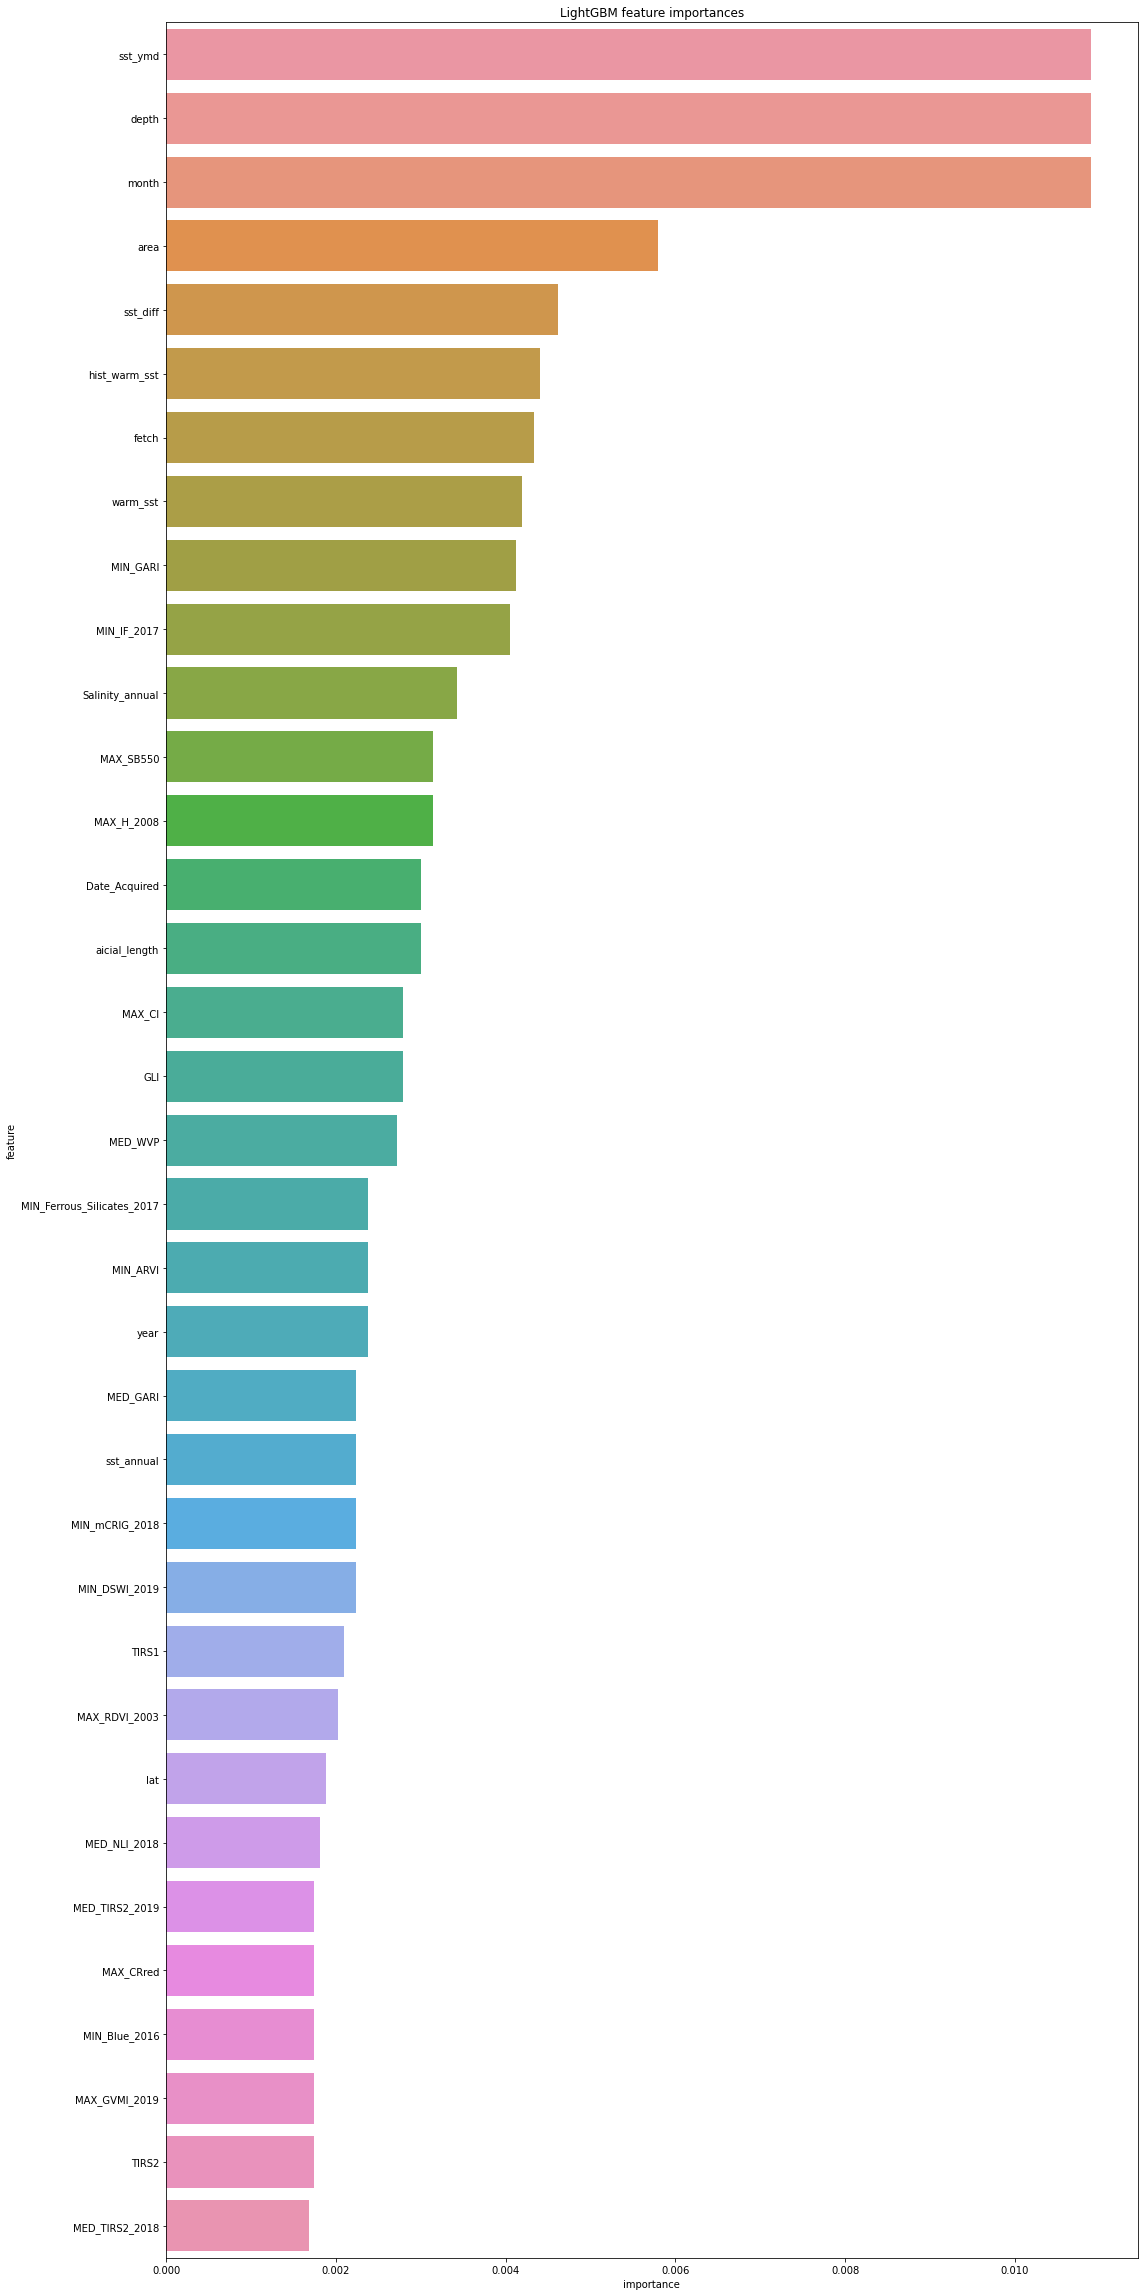

In [26]:
model1 = lgb.LGBMClassifier(**params1)
flag_oof, flag_test_pred = get_pred(train, test, CFG.fold_target1, CFG.target_cols1, model1, isFlag=True)

In [27]:
flag_oof["flag_state"] = (flag_oof["flag_pred"]>.5).astype(int)
test["flag_state"] = (np.mean(flag_test_pred, axis=1)>.5).astype(int)

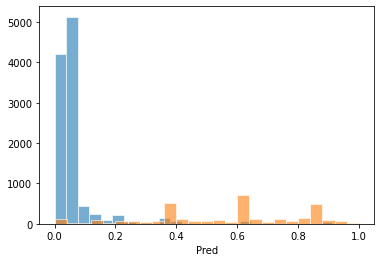

In [28]:
plt.hist(flag_oof.loc[flag_oof.flag_state==0]["cover"], label='flag=0', bins=25, edgecolor='white', alpha=.6)
plt.hist(flag_oof.loc[flag_oof.flag_state==1]["cover"], label='flag=1', bins=25, edgecolor='white', alpha=.6)
plt.xlabel("Pred")
plt.show()

In [29]:
big_train = flag_oof.loc[flag_oof.flag_state==1].reset_index(drop=True)
big_test = test.loc[test.flag_state==1]
print(big_train.shape, big_test.shape)

small_train = flag_oof.loc[flag_oof.flag_state==0].reset_index(drop=True)
small_test = test.loc[test.flag_state==0]
print(small_train.shape, small_test.shape)

(3391, 3474) (456, 3467)
(10749, 3474) (3583, 3467)


fold
0    848
1    847
2    848
3    848
dtype: int64

===============  FOLD : 0  ===============
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's rmse: 0.167256
Early stopping, best iteration is:
[257]	valid_0's rmse: 0.166943
RMSE 0.16694340610421904
===============  FOLD : 1  ===============


<ipython-input-25-2634382a3f2f>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = model.predict(valid_X)


Training until validation scores don't improve for 50 rounds.
[200]	valid_0's rmse: 0.171387
Early stopping, best iteration is:
[274]	valid_0's rmse: 0.171289


<ipython-input-25-2634382a3f2f>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = model.predict(valid_X)


RMSE 0.17128904321545854
===============  FOLD : 2  ===============
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's rmse: 0.169443
Early stopping, best iteration is:
[175]	valid_0's rmse: 0.169234
RMSE 0.16923352509122772
===============  FOLD : 3  ===============


<ipython-input-25-2634382a3f2f>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = model.predict(valid_X)


Training until validation scores don't improve for 50 rounds.
[200]	valid_0's rmse: 0.172936
Early stopping, best iteration is:
[246]	valid_0's rmse: 0.172839
RMSE 0.172838549934867


<ipython-input-25-2634382a3f2f>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = model.predict(valid_X)


,feature,importance
2378,sst_diff,0.007821
2861,month,0.006976
605,Blue,0.006095
2639,TIRS1,0.005884
2920,MAX_CI,0.005109
579,MCARI1,0.004932
2496,sst_ymd,0.004827
2660,SWIR2,0.004721
2241,TIRS2,0.004333
1490,Alteration,0.004298


RMSE 0.1700902002671635


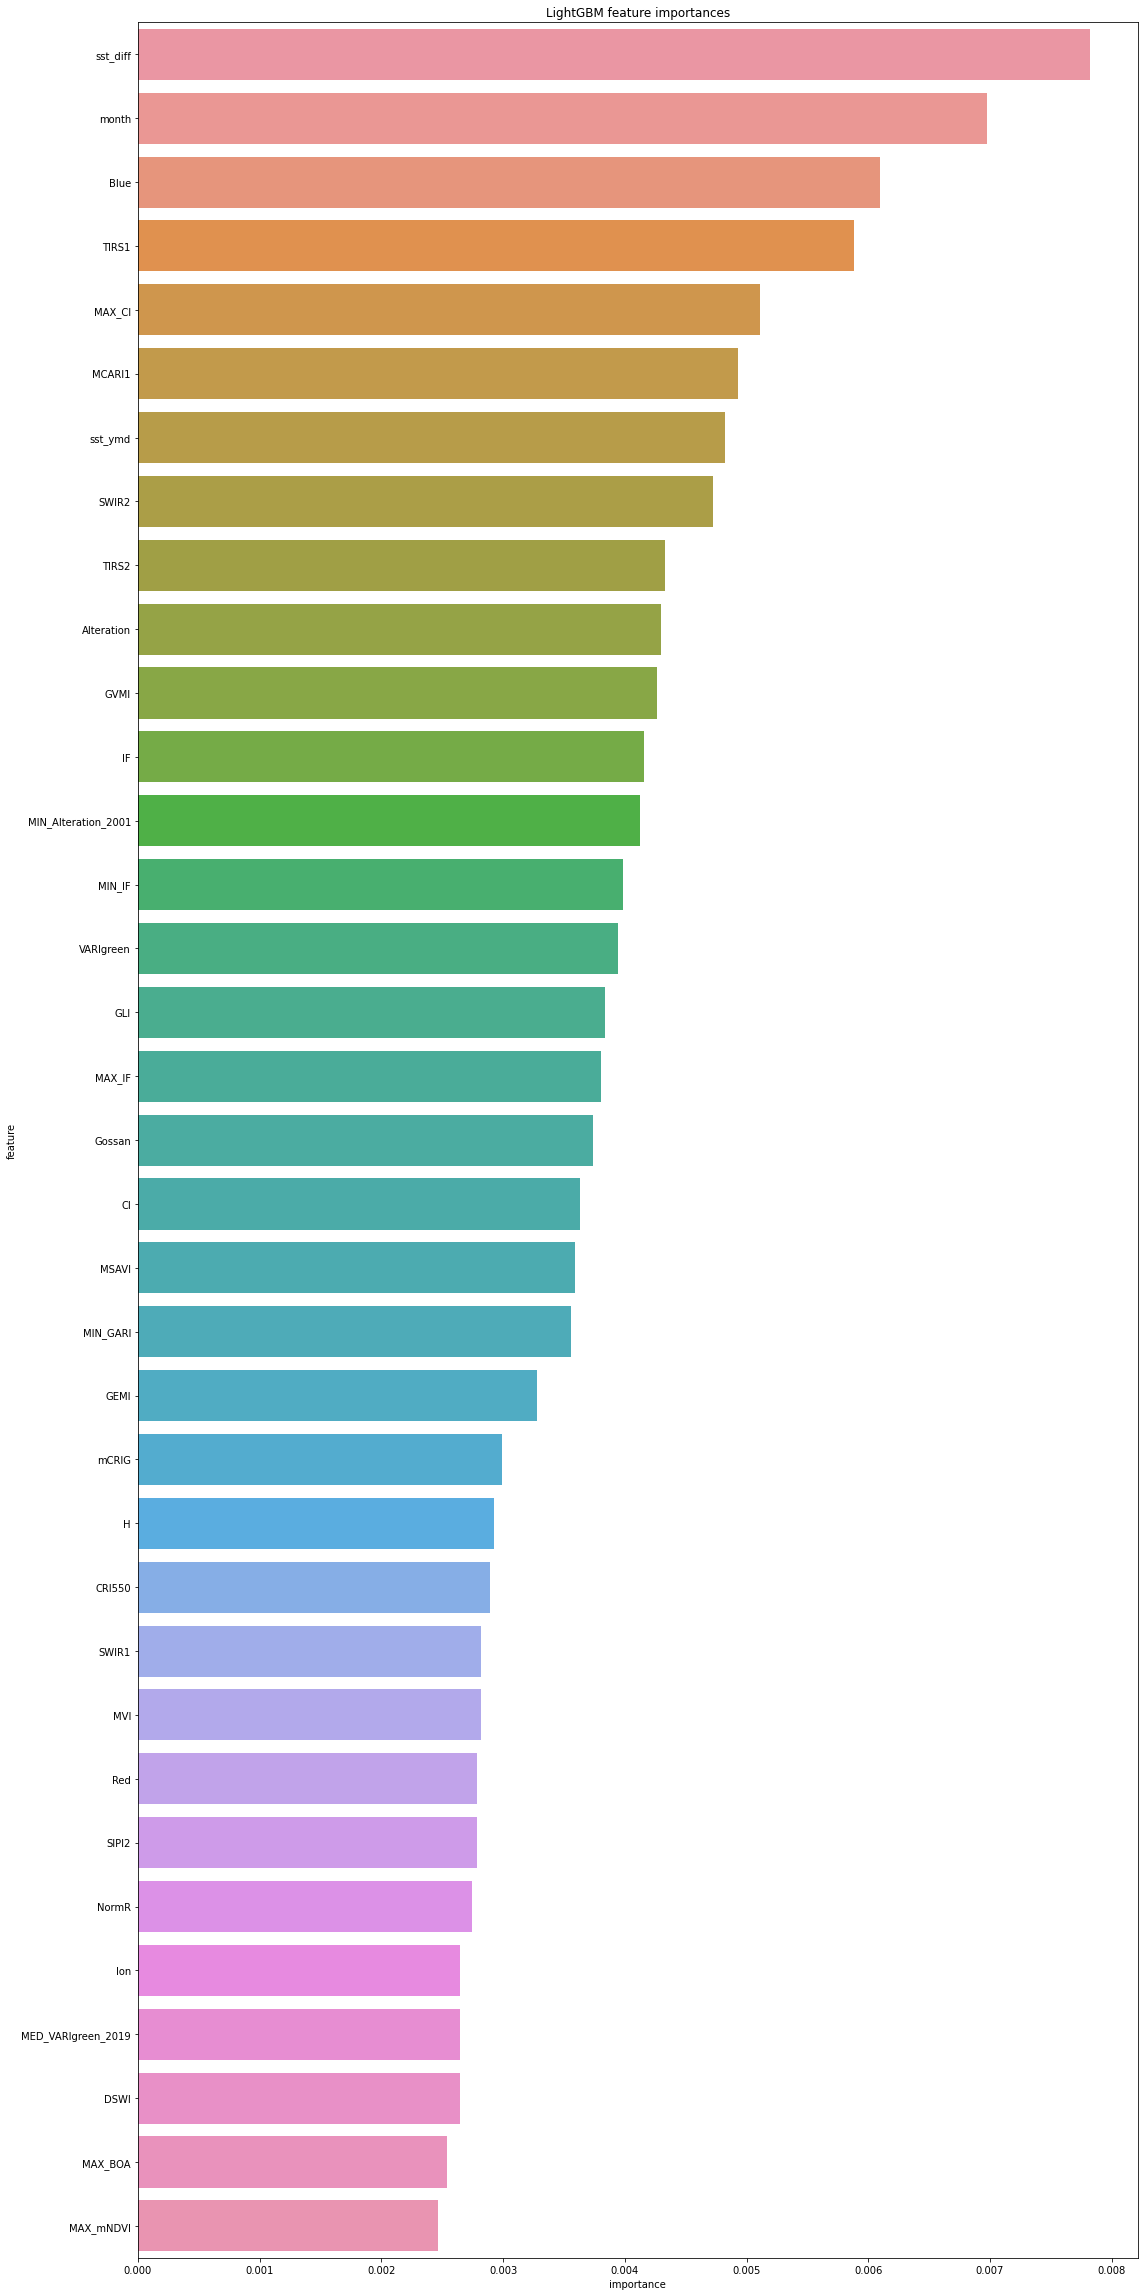

In [30]:
model2 = lgb.LGBMRegressor(**params2)
big_oof, big_test_pred = get_pred(big_train, big_test, CFG.fold_target3, CFG.target_cols2, model2)

fold
0    2687
1    2687
2    2688
3    2687
dtype: int64

===============  FOLD : 0  ===============
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's rmse: 0.0770505
Early stopping, best iteration is:
[293]	valid_0's rmse: 0.0768441


<ipython-input-25-2634382a3f2f>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = model.predict(valid_X)


RMSE 0.07684407419208565
===============  FOLD : 1  ===============
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's rmse: 0.0930394
[400]	valid_0's rmse: 0.0925381
Early stopping, best iteration is:
[402]	valid_0's rmse: 0.0925376


<ipython-input-25-2634382a3f2f>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = model.predict(valid_X)


RMSE 0.09253761756085783
===============  FOLD : 2  ===============
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's rmse: 0.089229
[400]	valid_0's rmse: 0.0890233
Early stopping, best iteration is:
[356]	valid_0's rmse: 0.0889876


<ipython-input-25-2634382a3f2f>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = model.predict(valid_X)


RMSE 0.08898764077142533
===============  FOLD : 3  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[111]	valid_0's rmse: 0.0821151


<ipython-input-25-2634382a3f2f>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = model.predict(valid_X)


RMSE 0.08211509436739796


,feature,importance
2496,sst_ymd,0.004188
2861,month,0.003701
2920,MAX_CI,0.002840
1679,year,0.002668
2131,warm_sst,0.002582
510,depth,0.002266
2241,TIRS2,0.002238
2849,MIN_VARIgreen_2005,0.002238
2569,MAX_MCARI_OSAVI,0.002180
254,MIN_IF,0.002065


RMSE 0.08533778197324629


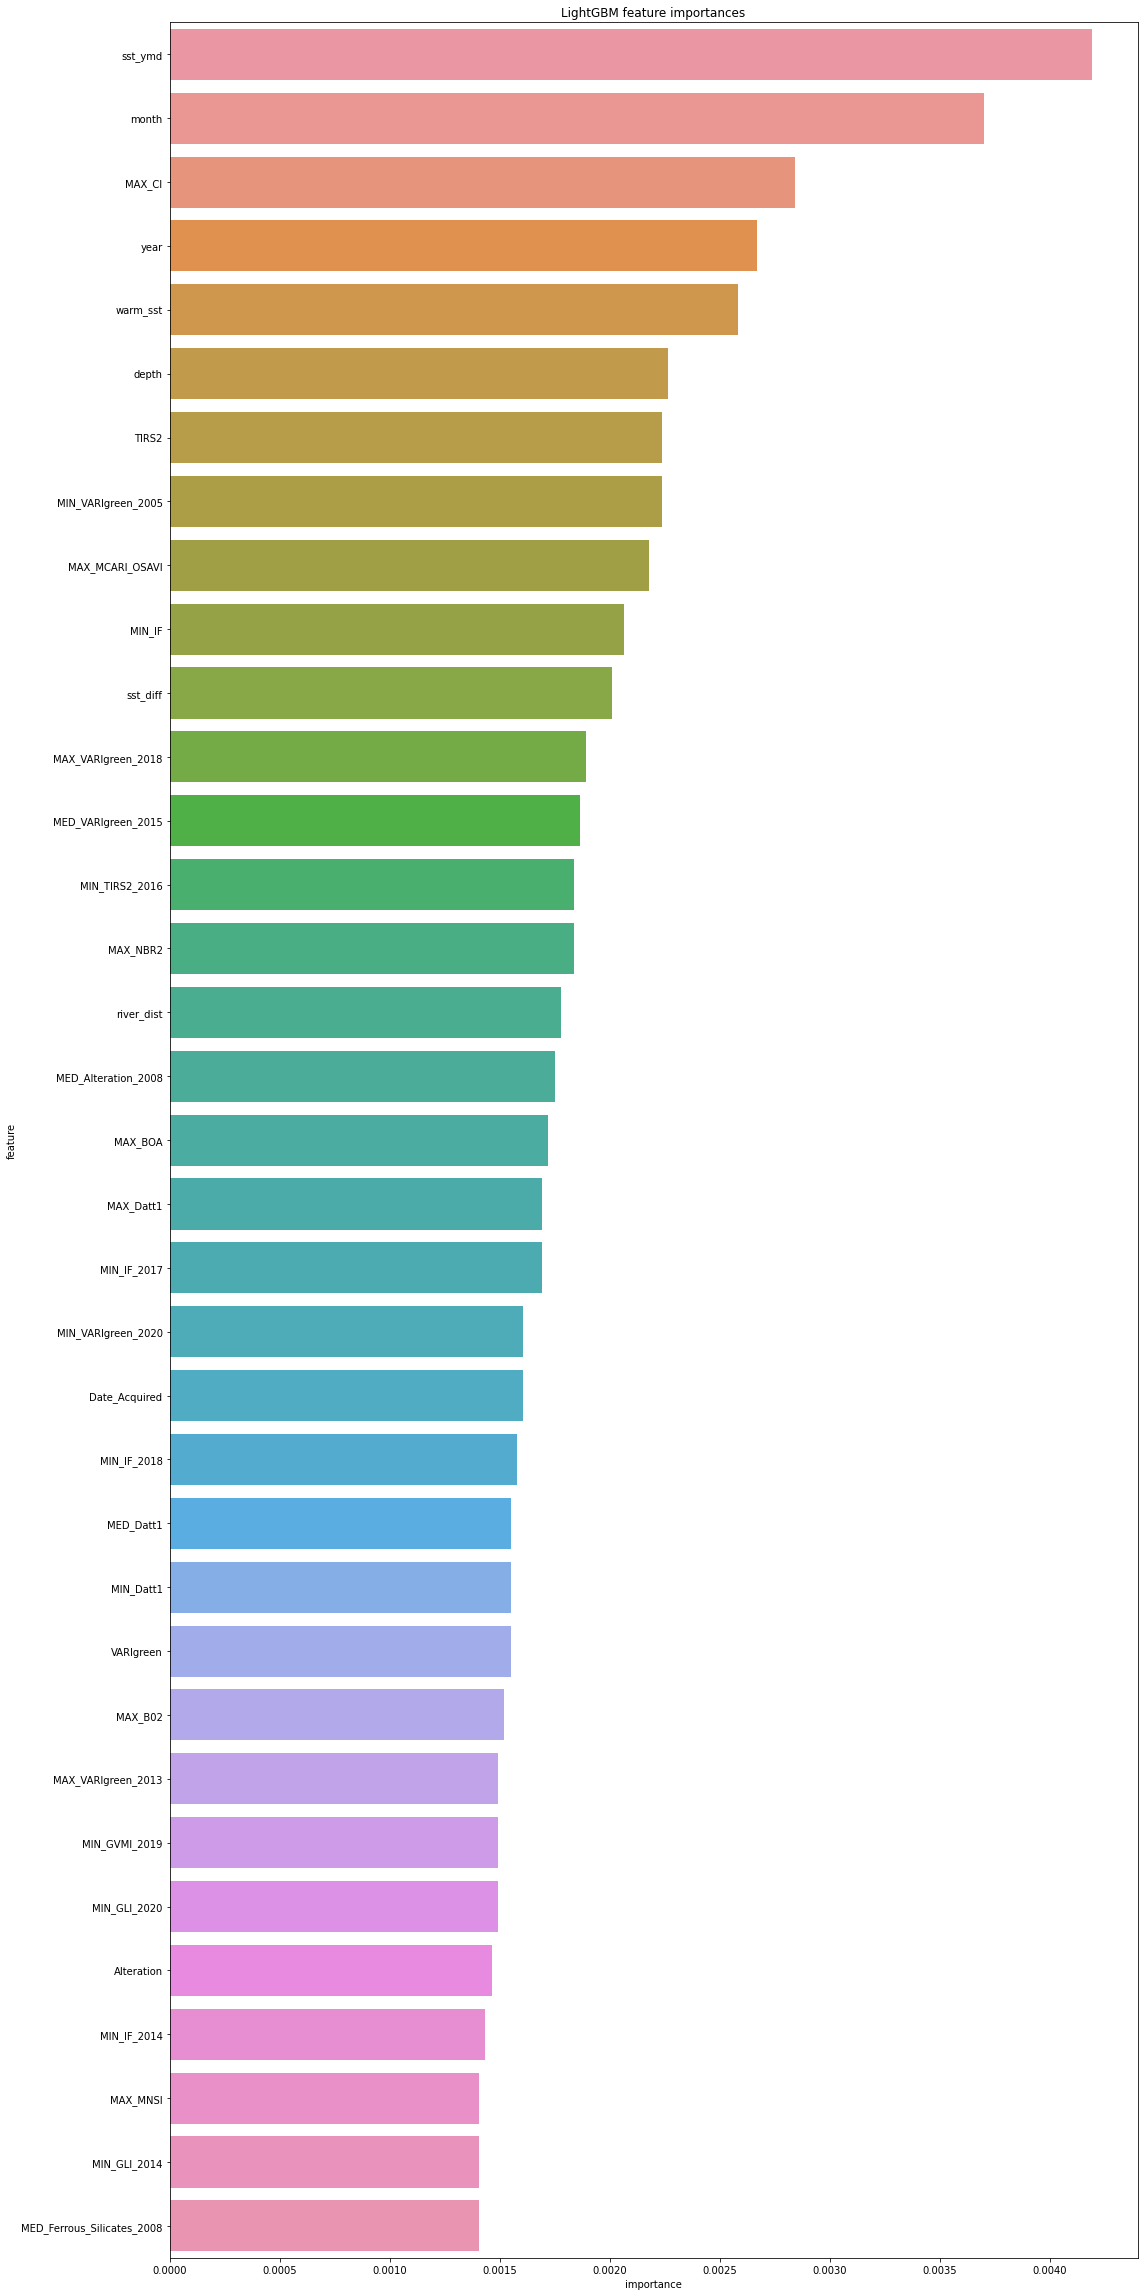

In [31]:
small_oof, small_test_pred = get_pred(small_train, small_test, CFG.fold_target2, CFG.target_cols2, model2)

In [32]:
_oof = pd.concat([big_oof,small_oof])
get_score(_oof["cover"], _oof["_pred"])

RMSE 0.11168755470414325


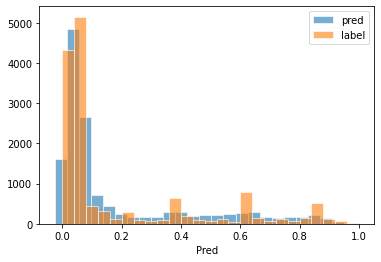

In [33]:
plt.hist(_oof._pred, label='pred', bins=25, edgecolor='white', alpha=.6)
plt.hist(_oof.cover, label="label", bins=25, edgecolor='white', alpha=.6)
plt.xlabel("Pred")
plt.legend()
plt.show()

In [34]:
big_test["pred"] = np.mean(big_test_pred, axis=1)
small_test["pred"] = np.mean(small_test_pred, axis=1)

pred_df = pd.concat([big_test,small_test])
pred_df = pred_df.sort_index()
pred_df

<ipython-input-34-af2995658256>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_test["pred"] = np.mean(big_test_pred, axis=1)
<ipython-input-34-af2995658256>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_test["pred"] = np.mean(small_test_pred, axis=1)


,id,lat,lon,area,YMD,year,month,depth_original,cliff_length,aicial_length,...,MIN_RDVI_2020,MIN_IF_2020,MIN_SLAVI_2020,MIN_SIPI2_2020,MIN_VARIgreen_2020,mesh20,mesh20_left,mesh20_right,flag_state,pred
0,0,24.352222,124.202674,20.0,2002.12,2002.0,12.0,0.5,0.000000,725.621704,...,-3.203797,4.297234,926.905329,1.669992,0.194766,3624_20,3624,20,0,0.018728
1,1,24.420028,124.078583,20.0,20100723,2010.0,7.0,NaN,0.000000,0.000000,...,-2.222276,2.263106,57.661693,4.274851,-79.273275,3624_20,3624,20,0,0.067841
2,2,26.494197,127.836013,100.0,"2004.2.20-2004.2.22,2004.2.27-2004.2.29,2004.3...",2004.0,2.0,13.8,73.183418,80.595177,...,-2.060505,2.099250,42.672829,5.655713,-2.061417,3927_23,3927,23,0,0.047560
3,3,26.183639,127.319361,20.0,20100805,2010.0,8.0,NaN,0.000000,0.000000,...,-2.708627,-10.433323,45.061952,1.546086,-14.527890,3927_11,3927,11,0,0.056954
4,4,24.761089,125.269009,20.0,NaN,2019.0,10.0,-0.5,0.000000,34.796036,...,-5.249625,2.563503,80.374689,1.827876,-6.335208,3725_01,3725,1,0,0.206465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034,4034,26.702075,127.873347,20.0,NaN,2019.0,9.0,0.4,0.000000,20.594961,...,-3.207146,3.633575,60.936945,3.053976,-28.354402,4027_03,4027,3,0,0.076321
4035,4035,24.337028,124.232694,20.0,20101122,2010.0,11.0,NaN,0.000000,0.000000,...,-2.385447,2.495430,75.231230,3.946128,-2.112646,3624_20,3624,20,0,0.044107
4036,4036,26.493121,127.839918,100.0,"2004.2.20-2004.2.22,2004.2.27-2004.2.29,2004.3...",2004.0,2.0,0.1,76.439651,133.127228,...,-4.397375,4.403977,117.513676,1.904304,0.601280,3927_23,3927,23,0,0.121908
4037,4037,24.068778,123.804194,20.0,20110415,2011.0,4.0,NaN,73.660492,0.000000,...,-3.821984,2.203933,121.654726,2.282056,-2.029225,3623_03,3623,3,0,0.126870


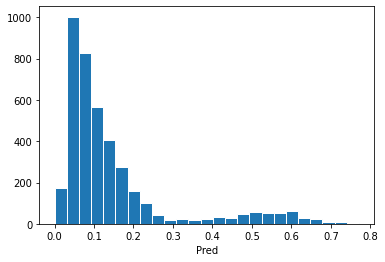

,id,lat,lon,area,YMD,year,month,depth_original,cliff_length,aicial_length,...,MIN_RDVI_2020,MIN_IF_2020,MIN_SLAVI_2020,MIN_SIPI2_2020,MIN_VARIgreen_2020,mesh20,mesh20_left,mesh20_right,flag_state,pred
0,0,24.352222,124.202674,20.0,2002.12,2002.0,12.0,0.5,0.000000,725.621704,...,-3.203797,4.297234,926.905329,1.669992,0.194766,3624_20,3624,20,0,0.018728
1,1,24.420028,124.078583,20.0,20100723,2010.0,7.0,NaN,0.000000,0.000000,...,-2.222276,2.263106,57.661693,4.274851,-79.273275,3624_20,3624,20,0,0.067841
2,2,26.494197,127.836013,100.0,"2004.2.20-2004.2.22,2004.2.27-2004.2.29,2004.3...",2004.0,2.0,13.8,73.183418,80.595177,...,-2.060505,2.099250,42.672829,5.655713,-2.061417,3927_23,3927,23,0,0.047560
3,3,26.183639,127.319361,20.0,20100805,2010.0,8.0,NaN,0.000000,0.000000,...,-2.708627,-10.433323,45.061952,1.546086,-14.527890,3927_11,3927,11,0,0.056954
4,4,24.761089,125.269009,20.0,NaN,2019.0,10.0,-0.5,0.000000,34.796036,...,-5.249625,2.563503,80.374689,1.827876,-6.335208,3725_01,3725,1,0,0.206465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034,4034,26.702075,127.873347,20.0,NaN,2019.0,9.0,0.4,0.000000,20.594961,...,-3.207146,3.633575,60.936945,3.053976,-28.354402,4027_03,4027,3,0,0.076321
4035,4035,24.337028,124.232694,20.0,20101122,2010.0,11.0,NaN,0.000000,0.000000,...,-2.385447,2.495430,75.231230,3.946128,-2.112646,3624_20,3624,20,0,0.044107
4036,4036,26.493121,127.839918,100.0,"2004.2.20-2004.2.22,2004.2.27-2004.2.29,2004.3...",2004.0,2.0,0.1,76.439651,133.127228,...,-4.397375,4.403977,117.513676,1.904304,0.601280,3927_23,3927,23,0,0.121908
4037,4037,24.068778,123.804194,20.0,20110415,2011.0,4.0,NaN,73.660492,0.000000,...,-3.821984,2.203933,121.654726,2.282056,-2.029225,3623_03,3623,3,0,0.126870


In [35]:
pred_df["pred"] = pred_df["pred"].apply(lambda x: x if x>0 else 0)
pred_df["pred"] = pred_df["pred"].apply(lambda x: x if x<1 else 1)
pred_df[["pred"]].to_csv(os.path.join(OUTPUT_DIR, f'submit_{CFG.model}_seed{CFG.seed}_ver{CFG.ver}.csv'), header=False)

plt.hist(pred_df.pred,bins=25,edgecolor='white')
plt.xlabel("Pred")
plt.show()

display(pred_df)